In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('fish.csv')

In [3]:
data.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [4]:
data.shape

(84, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bream   84 non-null     object 
 1   242.0   84 non-null     float64
 2   23.2    84 non-null     float64
 3   25.4    84 non-null     float64
 4   30.0    84 non-null     float64
 5   38.4    84 non-null     float64
 6   13.4    84 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.7+ KB


In [6]:
data.describe()

,242.0,23.2,25.4,30.0,38.4,13.4
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,434.017857,27.388095,29.607143,33.157143,27.953571,12.859524
std,382.648669,11.348058,12.249630,13.272086,10.351142,2.129377
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.325000,20.950000,23.550000,16.875000,10.875000
50%,390.000000,28.450000,30.850000,35.050000,26.900000,13.700000
75%,657.500000,32.725000,36.000000,40.675000,39.225000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [7]:
data.isna().sum()

Bream    0
242.0    0
23.2     0
25.4     0
30.0     0
38.4     0
13.4     0
dtype: int64

In [8]:
col=['Species','A','B','C','D','E','F']

In [9]:
data=pd.read_csv("fish.csv",names=col)

In [10]:
data.head()

,Species,A,B,C,D,E,F
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [11]:
data=pd.get_dummies(data)

In [12]:
data.head()

,A,B,C,D,E,F,Species_Bream,Species_Pike,Species_Roach,Species_Smelt
0,242.0,23.2,25.4,30.0,38.4,13.4,1,0,0,0
1,290.0,24.0,26.3,31.2,40.0,13.8,1,0,0,0
2,340.0,23.9,26.5,31.1,39.8,15.1,1,0,0,0
3,363.0,26.3,29.0,33.5,38.0,13.3,1,0,0,0
4,430.0,26.5,29.0,34.0,36.6,15.1,1,0,0,0


In [13]:
#KMeans Clustering

In [14]:
from sklearn.cluster import KMeans

In [16]:
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
wcss

[12236544.02352941,
 4415864.071748767,
 1923737.5826696828,
 907320.0898888889,
 525863.4939910132,
 339894.81715804664,
 225283.71244740637,
 138404.4615079365,
 98158.22034126983,
 78987.11287698415,
 65148.43723015873,
 52626.089944444444]

In [18]:
# plotting no. of clusters Vs wcss

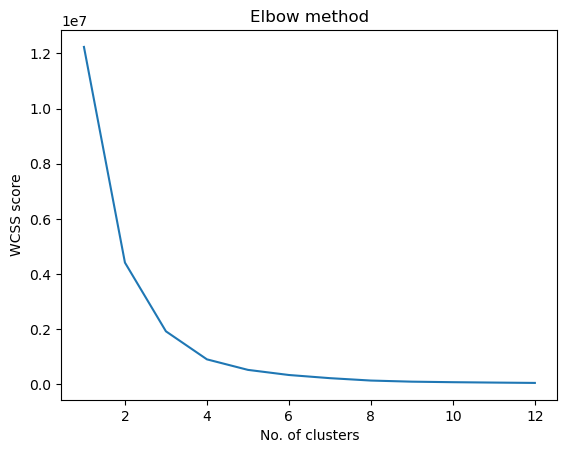

In [19]:
plt.plot(range(1,13),wcss)
plt.title('Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS score')
plt.show()

In [20]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data)

In [21]:
y_kmeans

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3])

In [22]:
print(y_kmeans)

[0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 2 2 2 2 1 1 3 3 3 3]


In [23]:
from sklearn.metrics import silhouette_score
silhouette_sc=silhouette_score(data,y_kmeans)
print(silhouette_sc)

0.6077749747794599
